# Term Project - building a model

In [1]:
%store -r x
%store -r x2
%store -r y
%store -r y2
%store -r y_cat
%store -r y2_cat
%store -r x_month
%store -r x2_month


In [2]:
# For data manipulation
import pandas as pd
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
print(x2.shape)
print(x2_month.shape)
print(y2.shape)
print(y2_cat.shape)

(2262, 503)
(2262, 24)
(2262,)
(2262,)


In [4]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import sklearn.metrics as skme


#split the data by train and test set.

x_train, x_test, y_train, y_test = train_test_split(x_month,y_cat, test_size = 0.3)

C:\Users\Studio\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [5]:
import sklearn.metrics as skme

"""Showing result by comparing predicted result and actual result.
Parameters:
    y_act (Series): actual result 
    y_pred (ndarray): predicted result
Returns: 
    None
"""
def show_result(y_act, y_pred):
    cm = skme.confusion_matrix(y_act, y_pred)
    print("The confusion matrix is as following")
    print(cm)
    plt.matshow(cm, cmap='tab20c')
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    acc = skme.accuracy_score(y_act, y_pred)
    print("This model's accuracy score is {:.4f}.".format(acc))
    auc = skme.roc_auc_score(y_act, y_pred)
    print("This model's ROC_AUC score is {:.4f}.".format(auc))
    pre = skme.precision_score(y_act, y_pred)
    print("This model's precision score is {:.4f}.".format(pre))
    #how many 1's are correctly identified.
    recall = skme.recall_score(y_act, y_pred)
    print("This model's recall score is {:.4f}.".format(recall))
    f1 = skme.f1_score(y_act, y_pred)
    print("This model's f1 score is {:.4f}.".format(f1))
    print("Here is the classification report summary:")
    print(skme.classification_report(y_act, y_pred))
    return None

In [6]:
"""Training data using PCA and classifier given
Parameters:
    x (Dataframe): x data
    y (Series): y data
    clf (List): a classifier, i.e. first component is str, second is a model, ['estimator',transformer()]
    clf_para (dictionary): a dictionary contains parameters for the classifier
Returns: 
    GridSearchCV: have same attributes like .best_score_
"""
def train_data(x, y, clf, clf_para):
    
    #define the feature reduction parameters
    
    N_COMPONENTS_OP = [5,7,9,13,15, 18]

    
    pipe = Pipeline([
            ('scaler', RobustScaler()),
            ('reduce_dim', PCA(svd_solver="randomized"))
    ])
    if clf is not None:
        pipe.steps.insert(2, clf)
        
    
    param_grid = {
        'reduce_dim__n_components': N_COMPONENTS_OP
   }
    
    if clf_para is not None:
        param_grid.update(clf_para)


    grid = GridSearchCV(pipe, cv=4, n_jobs=-1, param_grid=param_grid,
                        scoring='balanced_accuracy',verbose=3, error_score='raise')  #sorted(metrics.SCORERS.keys())
    grid.fit(x, y)

    return grid

## Create other classifiers

In [7]:
SGD = ['sgd', SGDClassifier(tol=1e-3,early_stopping=True)]
ASGD = ['asgd',SGDClassifier(average=True, max_iter=1000, tol=1e-3)]
LBFGS = ['lbfgs',LogisticRegression(solver='lbfgs', tol=1e-1)]
RF = ['rf', RandomForestClassifier(criterion="gini")]
KN = ['kn', KNeighborsClassifier(algorithm='ball_tree')]
GBC = ['gb', GradientBoostingClassifier()]
SVM_CLF=["svc", SVC(kernel="poly",gamma='scale')]  #based on past result SVC is a really back classifier, removed from model

SGD_PARA = {
    "".join([SGD[0], "__", "max_iter"]): [100, 1000, 2000],
    "".join([SGD[0], "__", "learning_rate"]): ["optimal", "adaptive"],
    "".join([SGD[0], "__", "eta0"]): [0.02,0.1,0.5]
}
ASGD_PARA = {
    "".join([ASGD[0], "__", "max_iter"]): [200, 1000, 2000],
    "".join([ASGD[0], "__", "learning_rate"]): ["optimal", "adaptive"],
    "".join([ASGD[0], "__", "eta0"]): [0.02,0.1,0.5]
}
LBFGS_PARA = {
    "".join([LBFGS[0], "__", "max_iter"]): [200, 500,1000],

    "".join([LBFGS[0], "__", "C"]): np.logspace(-2, 4, 10)
}
SVM_PARA = {
    "".join([SVM_CLF[0], "__", "degree"]): [2, 5, 8, 11],
    "".join([SVM_CLF[0], "__", "C"]): np.logspace(-2, 2, 10)
}

RF_PARA = {
    "".join([RF[0], "__", "n_estimators"]): [60, 70, 100],
    "".join([RF[0], "__", "max_features"]): [0.1, 0.05, 0.15],
}
KN_PARA = {
    "".join([KN[0], "__", "n_neighbors"]): [5,7,9,11,15],
    "".join([KN[0], "__", "weights"]): ["uniform", "distance"], 
    "".join([KN[0], "__", "leaf_size"]): [10, 20, 30]
}

GBC_PARA = {
    "".join([GBC[0], "__", "n_estimators"]): [30,50, 70],
    "".join([GBC[0], "__", "learning_rate"]): np.logspace(-1, 0,5),
    "".join([GBC[0], "__", "max_features"]): [0.05, 0.15, 0.20],
    "".join([GBC[0], "__", "max_depth"]): [3,5,7],
}

#list all the parameters for the classifier defined. 
para_grid = [SGD_PARA, ASGD_PARA,LBFGS_PARA, RF_PARA, KN_PARA,
            # SVM_PARA,
             GBC_PARA]

classifiers = [
    (SGD[0],SGD[1]),
    (ASGD[0], ASGD[1]),
    (LBFGS[0],LBFGS[1]),
    (RF[0], RF[1]),
    (KN[0], KN[1]),
    #(SVM_CLF[0], SVM_CLF[1]),
    (GBC[0], GBC[1]) 
]
import heapq


"""Traing the feeded data by using the classifier and parameter provided. Feed to the given function provided. in this case
the train_data function to train the model. Find the top three model trained. Then feed the top three model to a voting classifier
to do a round2 train. 
imbalanced data are balanced by using SMOTE. 
Parameters:
    x (DataFrame): independent variable
    y (Series): dependent variable
    classifiers (List): list of classifiers with the name and classifier object as each elements. 
    class_params (List): list of dictionary, each dictionary contains parameters to be turned by a pipeline for that 
            classifier contained in the classifiers parameter.
    func: func used to train each classifier. see train_data()
Returns: 
    VotingClassifier: voting classifier used by the method to train the data. 
"""

def train_all_model(x,y, classifiers, class_params, func):
    x_res, y_res = SMOTE(ratio=1.0).fit_sample(x,y)
    result_grids = []
    for i in range(len(classifiers)):
        grid = func(x_res,y_res,classifiers[i], class_params[i])  #using the train_data function to train each classifier
        result_grids.insert(i, grid)
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print("training for", classifiers[i][0]," is complete")
        print("best result is", grid.best_score_)
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    best = heapq.nlargest(3, result_grids, key = lambda s: s.best_score_)
    
    
    round2 = VotingClassifier(estimators=[
        ('1st', best[0].best_estimator_), 
        ('2nd', best[1].best_estimator_), 
        ('3rd', best[2].best_estimator_)],
        voting='soft')
    round2 = round2.fit(x_res, y_res)
    y_pred = round2.predict(x_res)
    
    show_result(y_res, y_pred)
    return round2
    

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
training for sgd  is complete
best result is 0.5436941410129096
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
training for asgd  is complete
best result is 0.5089374379344588
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
training for lbfgs  is complete
best result is 0.5963257199602781
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   11.8s finished


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
training for rf  is complete
best result is 0.8167825223435948
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
training for kn  is complete
best result is 0.7442899702085403
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Fitting 4 folds for each of 810 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  1.6min finished


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
training for gb  is complete
best result is 0.8157894736842105
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The confusion matrix is as following
[[1007    0]
 [   0 1007]]


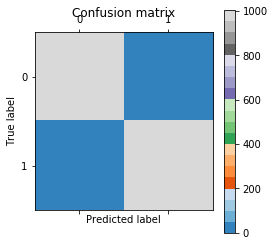

This model's accuracy score is 1.0000.
This model's ROC_AUC score is 1.0000.
This model's precision score is 1.0000.
This model's recall score is 1.0000.
This model's f1 score is 1.0000.
Here is the classification report summary:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      2014
   macro avg       1.00      1.00      1.00      2014
weighted avg       1.00      1.00      1.00      2014



In [8]:
#train all the model.
best = train_all_model(x_train,y_train, classifiers, para_grid,train_data)

In [9]:
print(best)

VotingClassifier(estimators=[('1st',
                              Pipeline(memory=None,
                                       steps=[('scaler',
                                               RobustScaler(copy=True,
                                                            quantile_range=(25.0,
                                                                            75.0),
                                                            with_centering=True,
                                                            with_scaling=True)),
                                              ('reduce_dim',
                                               PCA(copy=True,
                                                   iterated_power='auto',
                                                   n_components=18,
                                                   random_state=None,
                                                   svd_solver='randomized',
                                             

# Production result

In [10]:
"""Given the estimator, try to predict the result and show the result. 
Parameters:
    x_test (DataFrame): test dataset
    y_test (Series): test target
    best: the vote classifier used to train the model. 
Returns: 
    y_pred: predicted result.
    pred_prob: predicted probability for each target classes. 
"""

def test_result(best, x_test, y_test):
    y_pred = best.predict(RobustScaler().fit_transform(x_test))
    pred_prob = best.predict_proba(RobustScaler().fit_transform(x_test))
    show_result(y_test,y_pred)
    return y_pred, pred_prob

The confusion matrix is as following
[[404  27]
 [139   6]]


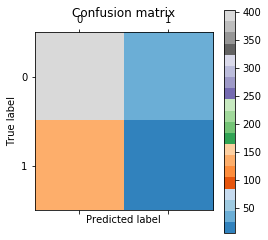

This model's accuracy score is 0.7118.
This model's ROC_AUC score is 0.4894.
This model's precision score is 0.1818.
This model's recall score is 0.0414.
This model's f1 score is 0.0674.
Here is the classification report summary:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       431
           1       0.18      0.04      0.07       145

    accuracy                           0.71       576
   macro avg       0.46      0.49      0.45       576
weighted avg       0.60      0.71      0.64       576



In [16]:
result1, result1_prob = test_result(best,x_test,y_test)

The confusion matrix is as following
[[1615   81]
 [ 530   36]]


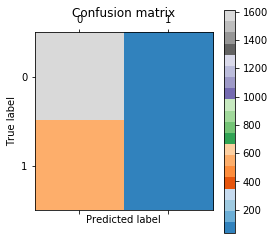

This model's accuracy score is 0.7299.
This model's ROC_AUC score is 0.5079.
This model's precision score is 0.3077.
This model's recall score is 0.0636.
This model's f1 score is 0.1054.
Here is the classification report summary:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1696
           1       0.31      0.06      0.11       566

    accuracy                           0.73      2262
   macro avg       0.53      0.51      0.47      2262
weighted avg       0.64      0.73      0.66      2262



In [12]:
result2, result2_prob = test_result(best, x2_month,y2_cat)

In [17]:
import random

"""Load the specific stock data by year by given stock ticker. 
Parameters:
    path (str): the folder where data were stored. i.e. "p_data/"
    names(List): List of stock ticker
    year(str): year in string. 
Returns: 
    data(DataFrame): dataframe contains the stock data for the year.  
"""

def load_by_names(path, names, year):
    data = pd.DataFrame(data={})
    for i in names:
        temp = pd.read_csv(path + i + ".csv" , encoding='utf-8')
        temp = temp.set_index('date')
        
        # select the close price for the year, for example. 
        # chose split adjusted price.
        temp = pd.DataFrame(temp.filter(like=year, axis=0).loc[:,'5. adjusted close'])
        old_r_name=temp.columns[0]
        temp = temp.T.rename(index={old_r_name: i})
        data = data.append(temp, sort = True)
    return data

"""Load the specific stock data by year by given stock ticker. 
Parameters:
    path (str): the folder where data were stored. i.e. "p_data/"
    names(List): List of stock ticker
    year(str): year in string. 
Returns: 
    data(DataFrame): dataframe contains the stock data for the year.  
"""
def estimate_return(act_y, pred_y, x,year, folder,pred_prob):
    #find top 10 most probable result for y = 1
    top10_percent = sorted(act_y[pred_prob[:,1] > 0.8], reverse = True)
    count = len(top10_percent)
    
    if count > 5:
        random_five = random.sample(range(1, count), 5)
        top5 = np.take(top10_percent, random_five)
        choices = 5
    else:
        top5 = top10_percent
        choices = count
    
    print("the average return based on top 10% of estimate is ", np.array(top5).mean())
    print(top5)
    index = x[act_y.isin(top5)].index
    selected = load_by_names(folder, index, year)
    for i in range(choices):
        selected.iloc[i].plot(legend=True)
        plt.show()
    print(selected.index)
    

In [18]:
y_pred = best.predict(RobustScaler().fit_transform(x2_month))
y_pred.shape

(2262,)

the average return based on top 10% of estimate is  0.516345634757716
[0.7030800311806292, 0.6635189418615073, 0.6302904153037963, 0.06849315068493152]


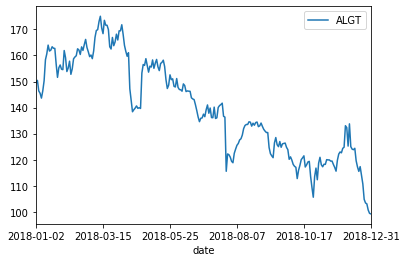

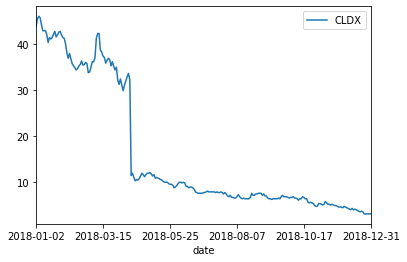

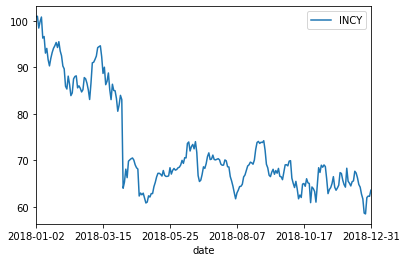

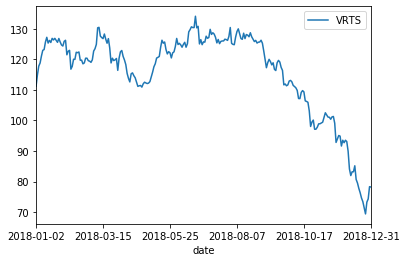

Index(['ALGT', 'CLDX', 'INCY', 'VRTS'], dtype='object')


In [19]:
estimate_return(y2, result2, x2, "2018", "p_data/", result2_prob)

the average return based on top 10% of estimate is  1.82708026603036
[1.82708026603036]


C:\Users\Studio\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


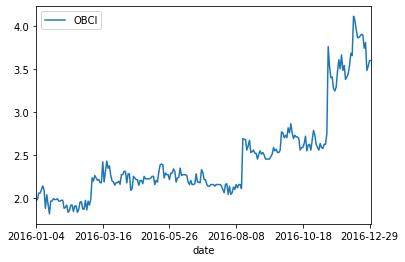

Index(['OBCI'], dtype='object')


In [20]:
estimate_return(y[y.index.isin(y_test.index)], result1, x_test, "2016", "p_data/",result1_prob)